<a href="https://colab.research.google.com/github/Sitraka17/Cartography-Maps/blob/main/RoadNamesTrying001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas contextily matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 37.3 MB/s eta 0:00:00


In [2]:
# Download the shapefiles for Luxembourg
!wget https://download.geofabrik.de/europe/luxembourg-latest-free.shp.zip -O luxembourg-latest-free.shp.zip

# Extract the shapefiles
!unzip luxembourg-latest-free.shp.zip -d luxembourg_shapefiles


--2024-05-20 14:16:17--  https://download.geofabrik.de/europe/luxembourg-latest-free.shp.zip
Resolving download.geofabrik.de (download.geofabrik.de)... 65.109.48.72, 65.109.50.43, 2a01:4f9:5a:25c3::2, ...
Connecting to download.geofabrik.de (download.geofabrik.de)|65.109.48.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71861566 (69M) [application/zip]
Saving to: ‘luxembourg-latest-free.shp.zip’

luxembourg-latest-f 100%[===================>]  68.53M  6.59MB/s    in 12s     

2024-05-20 14:16:29 (5.95 MB/s) - ‘luxembourg-latest-free.shp.zip’ saved [71861566/71861566]

Archive:  luxembourg-latest-free.shp.zip
  inflating: luxembourg_shapefiles/README  
 extracting: luxembourg_shapefiles/gis_osm_buildings_a_free_1.cpg  
  inflating: luxembourg_shapefiles/gis_osm_buildings_a_free_1.dbf  
  inflating: luxembourg_shapefiles/gis_osm_buildings_a_free_1.prj  
  inflating: luxembourg_shapefiles/gis_osm_buildings_a_free_1.shp  
  inflating: luxembourg_shapefiles/gis

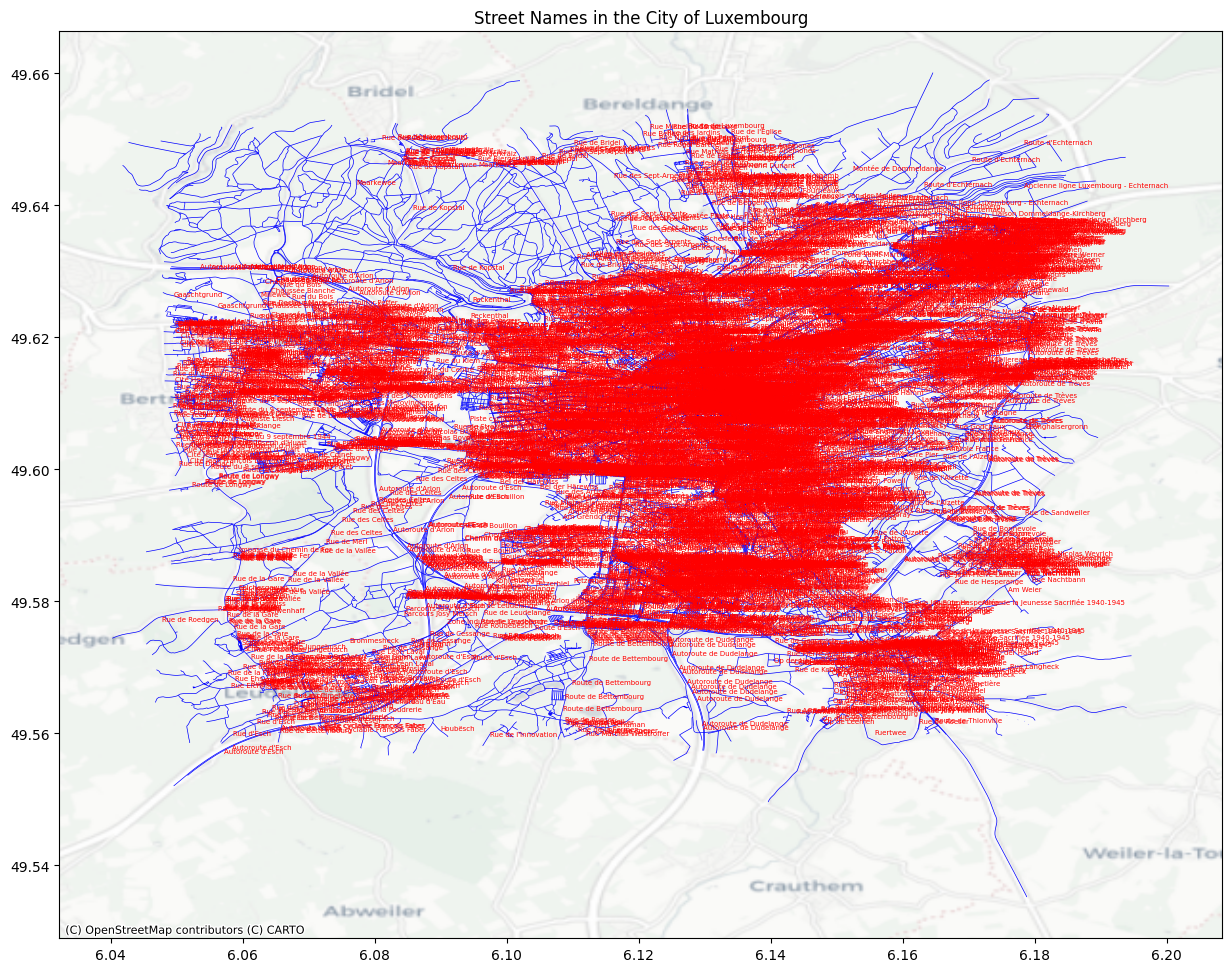

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the road data for Luxembourg
luxembourg_streets = gpd.read_file("luxembourg_shapefiles/gis_osm_roads_free_1.shp")

# Define the approximate bounding box for the city of Luxembourg
luxembourg_city_bounds = [6.05, 49.56, 6.18, 49.65]  # [xmin, ymin, xmax, ymax]

# Filter the streets within the bounding box
luxembourg_city_streets = luxembourg_streets.cx[luxembourg_city_bounds[0]:luxembourg_city_bounds[2],
                                                 luxembourg_city_bounds[1]:luxembourg_city_bounds[3]]

# Plot the streets
fig, ax = plt.subplots(figsize=(15, 15))
luxembourg_city_streets.plot(ax=ax, color='blue', linewidth=0.5)

# Add basemap tiles
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=luxembourg_city_streets.crs.to_string())

# Add street names
for idx, row in luxembourg_city_streets.iterrows():
    if row['name']:  # Check if the street has a name
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['name'], fontsize=5, color='red')

plt.title('Street Names in the City of Luxembourg')
plt.show()


<ipython-input-4-f5ee26e2eb73>:16: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  luxembourg_city_streets['length'] = luxembourg_city_streets.geometry.length
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


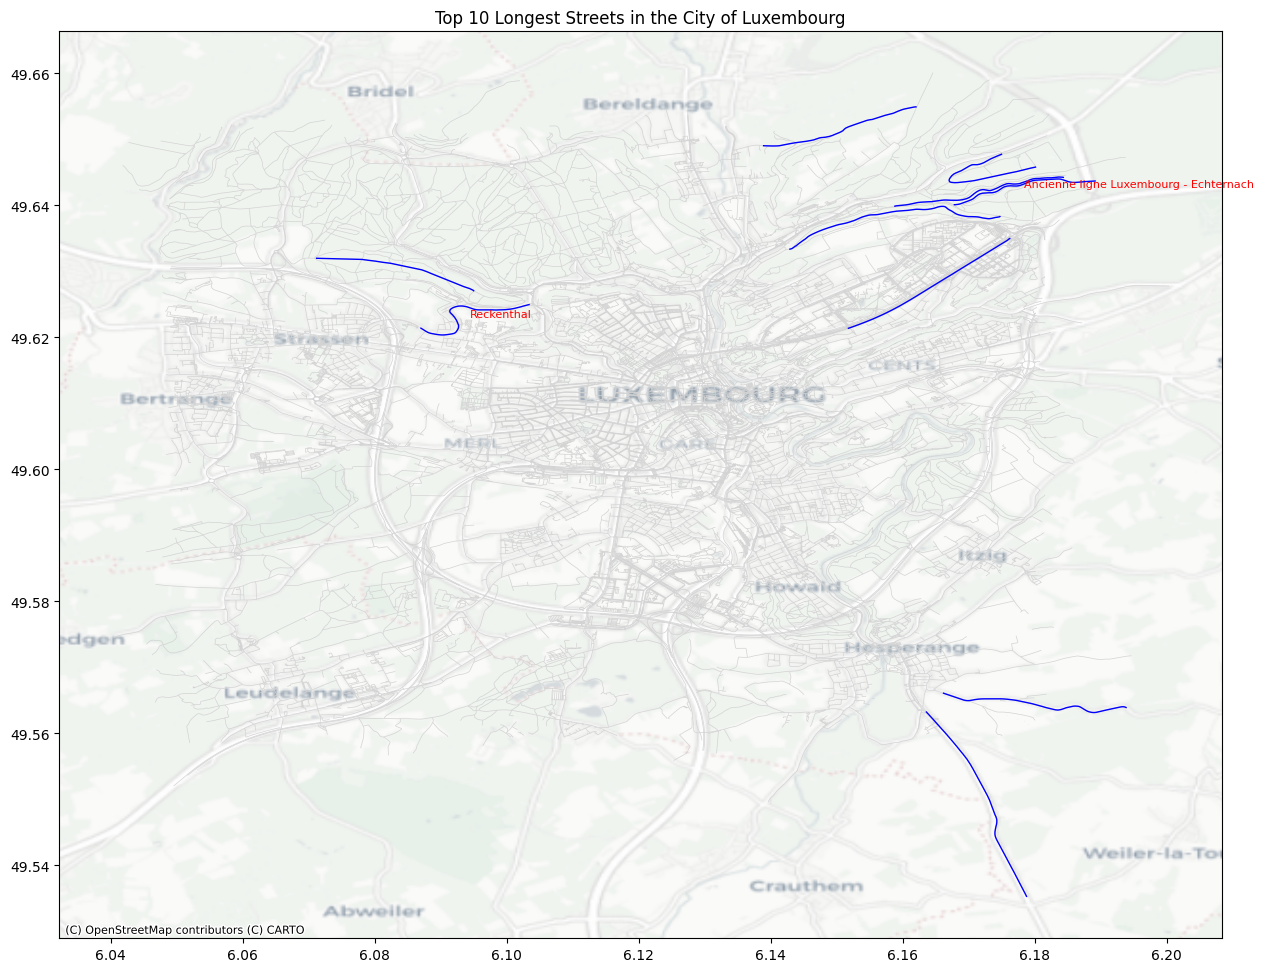

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the road data for Luxembourg
luxembourg_streets = gpd.read_file("luxembourg_shapefiles/gis_osm_roads_free_1.shp")

# Define the approximate bounding box for the city of Luxembourg
luxembourg_city_bounds = [6.05, 49.56, 6.18, 49.65]  # [xmin, ymin, xmax, ymax]

# Filter the streets within the bounding box
luxembourg_city_streets = luxembourg_streets.cx[luxembourg_city_bounds[0]:luxembourg_city_bounds[2],
                                                 luxembourg_city_bounds[1]:luxembourg_city_bounds[3]]

# Calculate the length of each street
luxembourg_city_streets['length'] = luxembourg_city_streets.geometry.length

# Sort the streets by length and select the top 10 longest streets
top_10_longest_streets = luxembourg_city_streets.nlargest(10, 'length')

# Plot the streets
fig, ax = plt.subplots(figsize=(15, 15))
luxembourg_city_streets.plot(ax=ax, color='lightgrey', linewidth=0.5)  # Plot all streets in light grey
top_10_longest_streets.plot(ax=ax, color='blue', linewidth=1)  # Highlight the top 10 longest streets

# Add basemap tiles
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=luxembourg_city_streets.crs.to_string())

# Add street names for the top 10 longest streets
for idx, row in top_10_longest_streets.iterrows():
    if row['name']:  # Check if the street has a name
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['name'], fontsize=8, color='red')

plt.title('Top 10 Longest Streets in the City of Luxembourg')
plt.show()


In [5]:
import geopandas as gpd
import pandas as pd

# Load the road data for Luxembourg
luxembourg_streets = gpd.read_file("luxembourg_shapefiles/gis_osm_roads_free_1.shp")

# Define the approximate bounding box for the city center of Luxembourg (Ville Haute)
city_center_bounds = [6.125, 49.605, 6.14, 49.615]  # [xmin, ymin, xmax, ymax]

# Filter the streets within the bounding box
city_center_streets = luxembourg_streets.cx[city_center_bounds[0]:city_center_bounds[2],
                                            city_center_bounds[1]:city_center_bounds[3]]

# Filter out streets without a name
city_center_streets_named = city_center_streets[city_center_streets['name'].notnull()]

# Generate descriptive statistics
num_total_streets = len(city_center_streets_named)
num_unique_names = city_center_streets_named['name'].nunique()
most_common_names = city_center_streets_named['name'].value_counts().head(10)
avg_name_length = city_center_streets_named['name'].str.len().mean()
max_name_length = city_center_streets_named['name'].str.len().max()
min_name_length = city_center_streets_named['name'].str.len().min()

# Display the results
print(f"Total number of streets with names in the city center: {num_total_streets}")
print(f"Number of unique street names in the city center: {num_unique_names}")
print("\nMost common street names in the city center:")
print(most_common_names)
print(f"\nAverage length of street names in the city center: {avg_name_length:.2f} characters")
print(f"Maximum length of street names in the city center: {max_name_length} characters")
print(f"Minimum length of street names in the city center: {min_name_length} characters")


Total number of streets with names in the city center: 475
Number of unique street names in the city center: 137

Most common street names in the city center:
name
Boulevard Franklin D. Roosevelt     23
Place de la Constitution            15
Plateau du Saint-Esprit             13
Avenue Monterey                     11
Boulevard Royal                     10
Avenue de la Liberté                10
Passerelle cyclable pont Adolphe     9
Boulevard de la Pétrusse             9
Rue Wiltheim                         8
Montée de Clausen                    8
Name: count, dtype: int64

Average length of street names in the city center: 17.83 characters
Maximum length of street names in the city center: 34 characters
Minimum length of street names in the city center: 8 characters


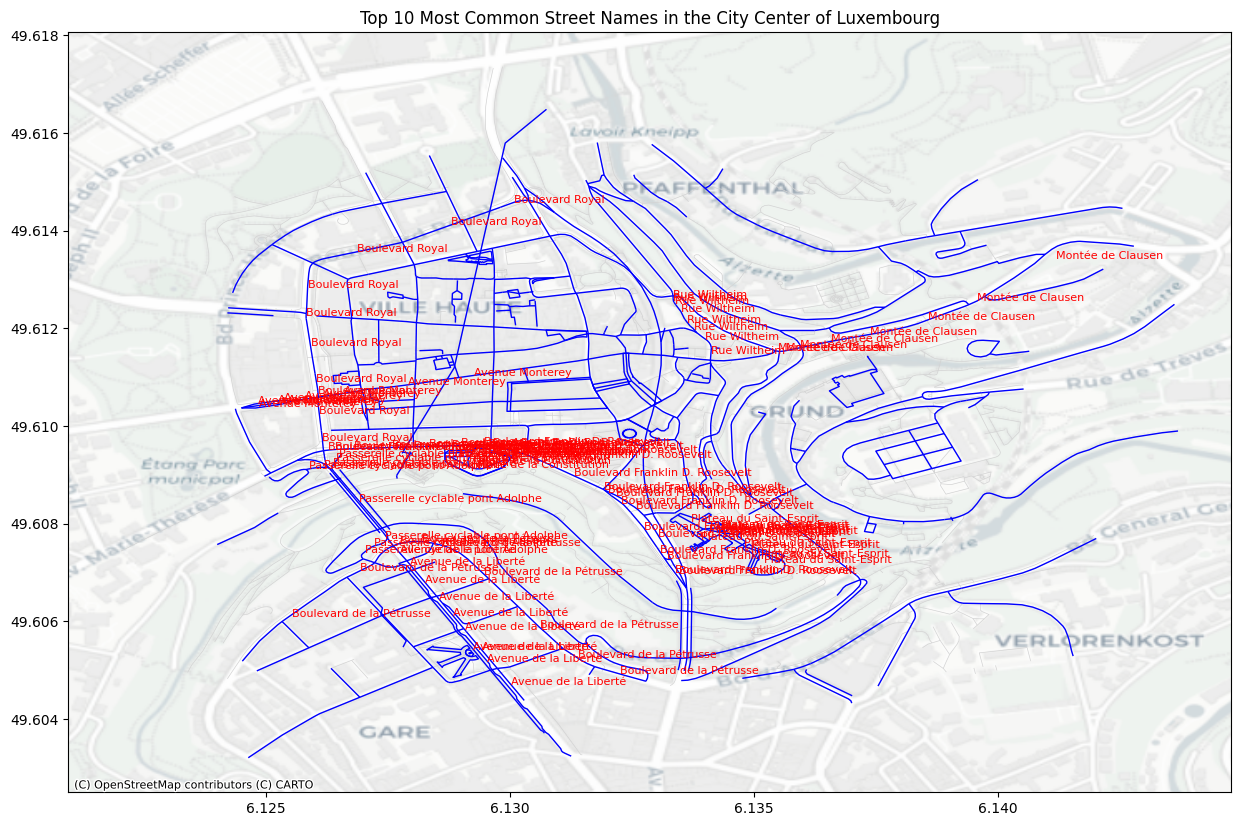

Top 10 Most Common Street Names in the City Center of Luxembourg:
name
Boulevard Franklin D. Roosevelt     23
Place de la Constitution            15
Plateau du Saint-Esprit             13
Avenue Monterey                     11
Boulevard Royal                     10
Avenue de la Liberté                10
Passerelle cyclable pont Adolphe     9
Boulevard de la Pétrusse             9
Rue Wiltheim                         8
Montée de Clausen                    8
Name: count, dtype: int64


In [6]:
# Load the road data for Luxembourg
luxembourg_streets = gpd.read_file("luxembourg_shapefiles/gis_osm_roads_free_1.shp")

# Define the approximate bounding box for the city center of Luxembourg (Ville Haute)
city_center_bounds = [6.125, 49.605, 6.14, 49.615]  # [xmin, ymin, xmax, ymax]

# Filtering
city_center_streets = luxembourg_streets.cx[city_center_bounds[0]:city_center_bounds[2],
                                            city_center_bounds[1]:city_center_bounds[3]]
city_center_streets_named = city_center_streets[city_center_streets['name'].notnull()]

# Calculate the top 10 most common street names
top_10_common_names = city_center_streets_named['name'].value_counts().head(10)

# Plot the streets in the city center
fig, ax = plt.subplots(figsize=(15, 15))
city_center_streets.plot(ax=ax, color='lightgrey', linewidth=0.5)  # Plot all streets in light grey
city_center_streets_named.plot(ax=ax, color='blue', linewidth=1)  # Highlight the named streets

# Add basemap tiles
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=city_center_streets.crs.to_string())

# Add street names for the top 10 most common streets
for idx, row in city_center_streets_named.iterrows():
    if row['name'] in top_10_common_names.index:  # Check if the street name is in the top 10
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['name'], fontsize=8, color='red')

plt.title('Top 10 Most Common Street Names in the City Center of Luxembourg')
plt.show()

# Display the top 10 most common street names
print("Top 10 Most Common Street Names in the City Center of Luxembourg:")
print(top_10_common_names)


In [2]:
# Télécharger les fichiers shapefiles nécessaires
!wget https://download.geofabrik.de/europe/france/ile-de-france-latest-free.shp.zip -O ile-de-france-latest-free.shp.zip
!wget https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=shp&timezone=Europe/Berlin&lang=fr -O arrondissements-paris-shp.zip

# Extraire les fichiers shapefiles
!unzip ile-de-france-latest-free.shp.zip -d ile_de_france_shapefiles
!unzip arrondissements-paris-shp.zip -d arrondissements_shapefiles


--2024-05-19 14:31:08--  https://download.geofabrik.de/europe/france/ile-de-france-latest-free.shp.zip
Resolving download.geofabrik.de (download.geofabrik.de)... 65.109.50.43, 65.109.48.72, 2a01:4f9:5a:2797::2, ...
Connecting to download.geofabrik.de (download.geofabrik.de)|65.109.50.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 507835202 (484M) [application/zip]
Saving to: ‘ile-de-france-latest-free.shp.zip’

ile-de-france-lates 100%[===================>] 484.31M  1.19MB/s    in 6m 6s   

2024-05-19 14:37:15 (1.32 MB/s) - ‘ile-de-france-latest-free.shp.zip’ saved [507835202/507835202]

/bin/bash: line 1: -O: command not found
--2024-05-19 14:37:15--  https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=shp
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58394 (57

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Charger les données OpenStreetMap pour Paris (fichier des rues)
paris_streets = gpd.read_file("ile_de_france_shapefiles/gis_osm_roads_free_1.shp")

# Charger les limites administratives de Paris (arrondissements)
paris_boundary = gpd.read_file("arrondissements_shapefiles/arrondissements.shp")

# Assurer que les projections sont les mêmes
paris_streets = paris_streets.to_crs(paris_boundary.crs)

# Filtrer les rues dans les limites de Paris
paris_streets = gpd.sjoin(paris_streets, paris_boundary, op='within')

# Plot des rues
fig, ax = plt.subplots(figsize=(15, 15))
paris_streets.plot(ax=ax, color='blue', linewidth=0.5)

# Ajouter des tuiles de fond de carte
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=paris_streets.crs.to_string())

# Ajouter les noms des rues
for idx, row in paris_streets.iterrows():
    if row['name']:  # Vérifier que le nom de la rue existe
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['name'], fontsize=5, color='red')

plt.title('Noms des rues de Paris')
plt.show()


ERROR:fiona._env:arrondissements_shapefiles/arrondissements.shp: No such file or directory


DriverError: arrondissements_shapefiles/arrondissements.shp: No such file or directory